### Q08 Implement ensemble learning algorithms boosting, bagging and stacking using scikitlearn

In [1]:
from sklearn.datasets import load_breast_cancer
x,y=load_breast_cancer(return_X_y=True)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [2]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,
                                              random_state=0)


Accuracy
RF :- 0.9649122807017544
ET :- 0.9473684210526315
BAG :- 0.9298245614035088
ADA :- 0.9649122807017544
GBC :- 0.9298245614035088
VOTING :- 0.9707602339181286
Execution Time
RF :- 0.32062625885009766
ET :- 0.1638484001159668
BAG :- 0.07202553749084473
ADA :- 0.20775461196899414
GBC :- 0.19093656539916992
VOTING :- 0.9239230155944824


<BarContainer object of 6 artists>

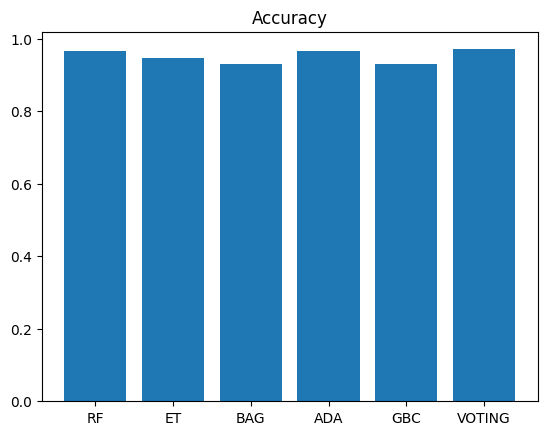

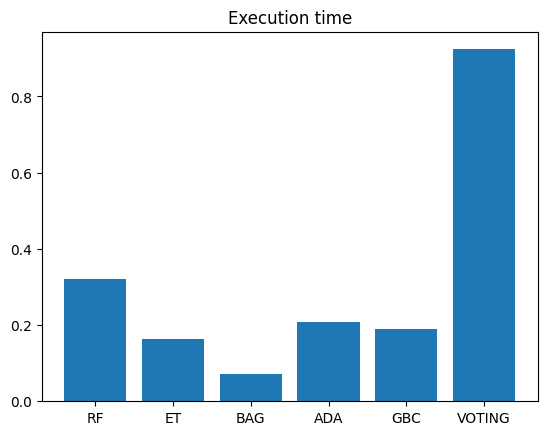

In [7]:
# bagging
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier
clf1=RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=5)
clf2=ExtraTreesClassifier(n_estimators=100,criterion='gini',max_depth=5)
clf3=BaggingClassifier(n_estimators=10,max_samples=1.0,max_features=1.0,
                      bootstrap=True) #base_estimator=knn
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
clf4=AdaBoostClassifier(n_estimators=50,learning_rate=1.0)#base_estimator=knn
clf5=GradientBoostingClassifier(n_estimators=50,learning_rate=1.0,max_depth=None)
from sklearn.ensemble import VotingClassifier
clf6=VotingClassifier(estimators=[('rf',clf1),('et',clf2),('bag',clf3),('ada',clf4),
                                 ('gbc',clf5)], voting='soft',weights=[1,1,1,1,1])
clf=[clf1,clf2,clf3,clf4,clf5,clf6]
clf_name=['RF','ET','BAG','ADA','GBC','VOTING']
acc={}
T={}#
import time#
from sklearn.metrics import accuracy_score
for model,model_name in zip(clf,clf_name):
    st=time.time()#
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    et=time.time()#
    acc[model_name]=accuracy_score(pred,y_test)
    T[model_name]=et-st#
print("Accuracy")
for i,j in acc.items():
    print(i,':-',j)
print("Execution Time")
for i,j in T.items(): #
    print(i,':-',j) #
import matplotlib.pyplot as plt
plt.title("Accuracy")
plt.bar(acc.keys(),acc.values())
plt.figure()
plt.title("Execution time")
plt.bar(T.keys(),T.values())